<a href="https://colab.research.google.com/github/momoh127/EC414-MachineLearningWork/blob/main/EC414_HW5_Fall2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5: Decision Tree & Boosting

**Due date**: October 30, Wednesday by 11:59pm


Both decision tree and the idea of boosting algorithms follows repetitive computations. They are not ideal questions to calculate purely by hand on a realistic scale. But it is also necessary to compute the actual numbers and build trees based on the algorithm to ensure a satisfactory amount of understanding. For question 1, although it follows a traditionally hand-written style, feel free to write some function to compute those formulas that are repetitively called, or anything free you from those numerical burdens. In either case, show all necessary intermediate steps/outputs or reasoning.


## **Question 1:** Build your own decision tree with ID3 (35pts)

To construct a decision tree, a popular heuristic is the ID3 algorithm. ID3 algorithm requires a Gain function  $G(S,i)$ , where $S$ is the set of all training examples, $i$ indicates that we use the $i^{th}$ feature for the current spilt.

For ID3 algorithm, two popular choice for the Gain function are:

1.   Train Error Gain
2.   Information Gain


Consider the table below, which outlines the impact of three key features (program age, availability of extracurricular activities, and learning environment) on student engagement within a specific school program. Each row in the table represents a unique combination of these features and their associated level of student engagement. Our goal is to apply the ID3 algorithm and construct a decision tree. This decision tree will enable us to predict whether a particular type of program is likely to result in high student engagement.

|Data Number || Program Age | Extracurriculars | Learning Environment | Student Engagement |
|------------||-------------|------------------|----------------------|--------------------|
|'1'|| Established | Available        | Traditional          | Low                |
|'2'|| Established | Not Available    | Online               | High               |
|'3'|| Established | Available        | Online               | Low                |
|'4'|| New         | Available        | Traditional          | High               |
|'5'|| New         | Available        | Online               | High               |
|'6'|| New         | Not Available    | Traditional          | High               |



#### 1.a Fill in the table below. Convert the above table to 0 or 1 for each feature attribute (3 pts)


**solution:**

|Date Number|| Program Age($x_1$)           | Extracurriculars($x_2$)                | Learning Environment($x_3$)                    | y                  |
|-----------||-------------|------------------|----------------------|--------------------|
|'1'||       0      |               1   |                  0    |            0        |
|'2'||         0    |           0       |       1               |      1              |
|'3'||       0      |           1       |                  1    |        0            |
|'4'||        1     |           1       |                0      |            1        |
|'5'||       1      |           1       |                1      |           1         |
|'6'||       1      |           0       |            0          |           1         |


#### 1.b Choosing first feature to split data (10 pts)

For now, $S$ is all data points in our dataset $S$ = {'1', '2', '3', '4', '5', '6'}. Compute $G$($S$, Program Age), $G$($S$, Extracurricular), and $G$($S$, Learning Environment) using the **training error gain**. Which feature will you choose to do your first split?

**solution:**

Training Error(S)=1−0.67=0.33

Both training error gain and information gain agree that Program Age (x1) should be used as the first feature for splitting



####1.c Now compute using **information gain**. You may assume $\log$ is base $2$ and $0 \cdot \log 0 = 0$ (10 pts)

Consider the impact of choosing information gain over training error gain when selecting the preferred feature to do our first split. Does it change the preferred feature to split? Explain your reasoning. Please free to use graphs and/or recalculate the gains to support your answer.

**solution:**
The feature to use for the first split, based on information gain, is also Program Age (x1). Since Program Age (x1) has the highest information gain, it is preferred as the splitting feature when using information gain as the criterion.




#### 1.d Continue the ID3 procedure using **train error gain** to finish building your full decision tree. **SHOW YOUR WORK!** (12 pts)

For each node in the decision tree, specify your set $S =$ {...} , which represents the subset of training examples that are yet to be split, and identify your set $F =${...}, which denotes the remaining features available to split the data. On the line that connects a parent node to a child node, label it with $x_f = 0$ or $x_f = 1$, where $f$ represents the index of the feature being used to perform the split.

Here is an image of what's described in the above text. Note that this is not the full tree.

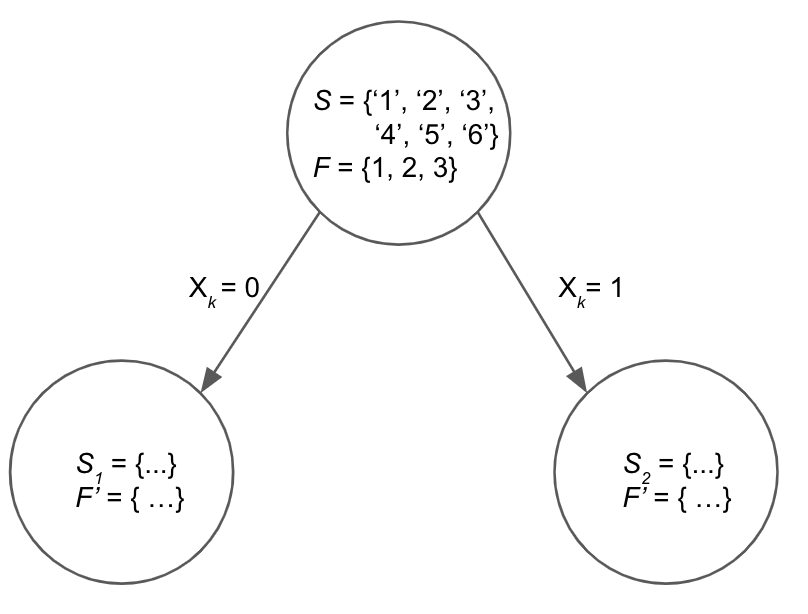

**solution:**

## **Question 2:** Decision Tree: real-valued features and labels (25pts)

Decision tree can also be applied to real-valued features. For instance, we can train a decision tree to predict real valued temperature given some real-valued features, such as readings from humidity, wind speed, etc.

This is achieved by an indicator function $\mathbb{1}_{ \{  TRUE \} } = 1, \mathbb{1}_{ \{  FALSE \} } = 0$. If we have a weather dataset (wind, temperature) as following:

| Data Number |  1 | 2 |3 | 4| 5| 6| 7| 8| 9|
| --- | --- | --- | | | | | | | |
| Wind (mph) | 22 | 13 |  13 | 19 | 12 | 11| 9| 7 |15 |
| Temperature (∘F)| 43 | 48 | 41 | 39 | 65 | 50 | 68 | 70 | 45|

A possible decision to predict temperature based on wind speed is to test whether wind speed is less than some threshold. For example, we can make split by querying $\mathbb{1}_{ \{ \text{wind} < 13 \} }$. The resultant split is:




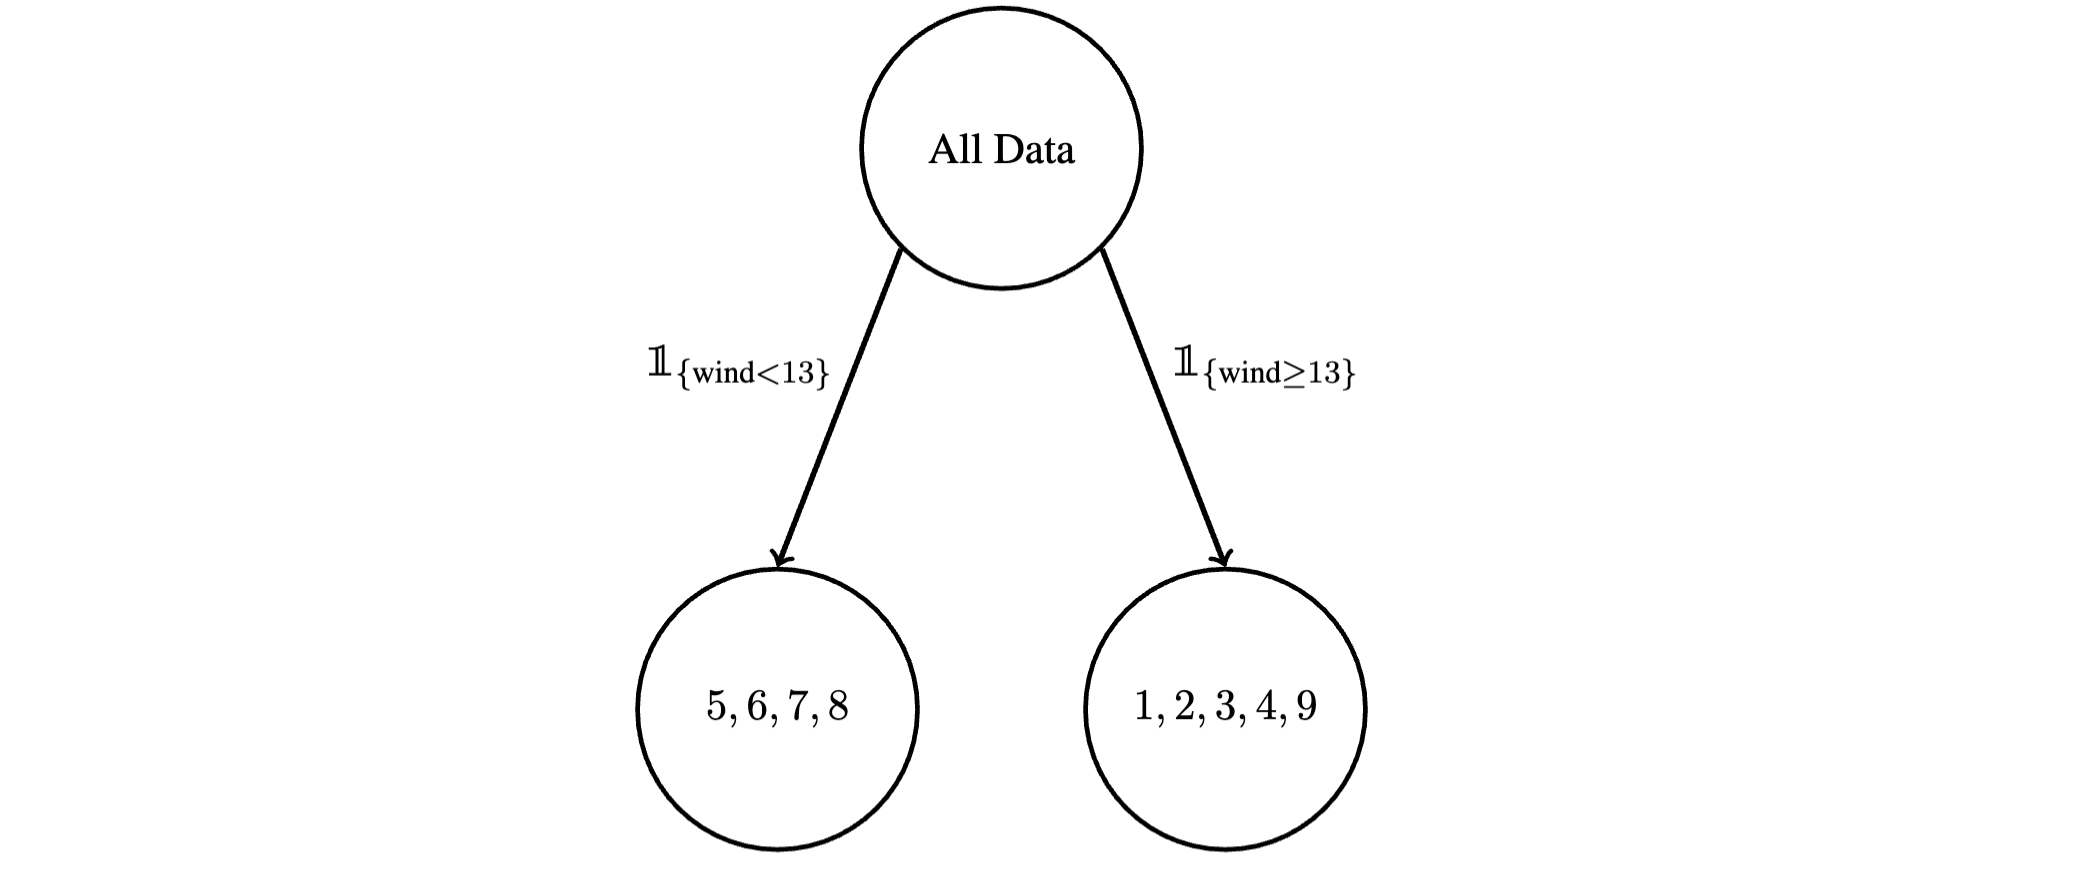

In this way, we construct yes/no questions with real-valued inputs (is the feature greater than the threshold?) and use the answers to these questions to build the decision tree.

The diagram above shows a trained decision tree with training data (actually it is a trained decision *stump*). Since we wish to predict a real number rather than make a binary classification, the prediction is made by the *average *label of a leaf rather than the most common label of the leaf. So the left leaf make prediction of temperature $(65+50+68+70) / 4 = 63.23$. The right leaf make prediction in the similar way yield to 43.2. For example, if a testing data is fed to the train with wind speed $16$ mph, the predicted temperature is 43.2.



Now, suppose we have a set of (Data, Label) $S = \{ (1,2), (2,-2), (3, 1)\} $, that is we have 3 data points where the feature vectors $x$ have dimension 1. We wan to train a decision tree to predict labels. We need to make splits according to a modified ID3 Algorithm, where we measure loss using the squared error rather than the 0-1 classification loss. For the first split, the modified algorithm is:

1.   Pick a set of thresholds $\theta_1, \cdots, \theta_M$. For each threshold $\theta_m$, make a split based on $\mathbb{1}_{\{ x < \theta_m \}}$
2.   For each $m = 1, \cdots, M$: denote a set $S_{1,m} = \{x_i : \mathbb{1}_{\{ x_i < \theta_m \}} \} $ and $S_{2,m} = \{x_i : \mathbb{1}_{\{ x_i \ge \theta_m \}} \} $
3.   For each $m = 1, \cdots, M$: Compute group average $\mu_{1,m}$ as the average of data points in $S_{1,m}$, similarly compute group average $\mu_{2,m}$ by using $S_{2,m}$
4.   For each $m = 1, \cdots, M$: Compute (mean squared) loss for making a split at $\theta_m$: $$L(S,m) = \frac{1}{|S|} \left(\sum_{x_i \in S_{1,m} } (y_i - \mu_{1,m})^2  + \sum_{x_j \in S_{2,m} } (y_j - \mu_{2,m})^2 \right)$$
5. Define $\mu$ to be the average label in the set $S$: $\mu=\frac{1}{|S|}\sum_{S} y_i$ and define the train error gain function: $$G(S,m) = \frac{1}{|S|}\sum_{x_i\in S} (y_i-\mu)^2 - L(S,m)$$.
5. Pick the splitting index for $\theta$ by $m^{\ast} = \underset{m}{\operatorname{argmax}} G(S,m)$


#### 2.1. Candidate Thresholds (15pts)

Although our feature is real-valued, from the algorithm displayed above, there are finite number of effective splits we need to consider in the context of our training set $S = \{ (1,2), (2,-2), (3, 1)\} $. Given this training set, if we make one split:

1.   What is a minimum (but sufficient) number for $M$.
2.   What values of $\theta_1, \cdots, \theta_M$ might you consider?

Note: the solution (to part 2) is not unique here, and you should not need  any extensive calculuations.



**solution:**



#### 2.2. Full Decision Tree (10pts)

A Full Decision Tree is one in which we constantly make splits until each leaf node contains data with one unique label.

1.   What is the training loss for a full decision tree?
2.   Is a full decision tree a high bias or a high variance model?
3.   If we need to train a decision tree on a bigger dataset, what would you do to combat the issue identified above?

**solution:**
1. Since each leaf node would then contain only one data point, there would be no error on the training data, making the training loss zero
2. It has low bias since it fits the training data perfectly, but the high variance makes it sensitive to small changes in the data
3. Limit the depth of the tree, use techniques like Random Forests or Boosting combine multiple trees to average out errors, and set a minimum number of sample per leaf

## **Question 3:** Boosting (30pts)


#### 3.1. Data and helper functions (5pts)

This section provides 2D training data `X` and its label `y`. We also provide a plot function `plot_adaboost()` to visualize training data with positive class plotted in blue and negative class plotted in red when first two arguments are provided. If extra arguments are provided:


*   `P`: weights of training data. If this argument is provided, then the size of the marker for each data point will be larger for data with higher  weight and smaller for data with lower weight.
*   `WL`: is a trained weak learner instance (decision stump: an example of wind-temperature model illustrated in question 2, and formally defined in question 3.2). If this argument is provided, then decision boundary will be plotted


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_adaboost(X, y, P = None, WL = None):
    ''' A function to plot data when first two attribute are provided, when the
        later attribute are also provided, the decision boundary and weight of
        each data will also be visulized

        arguments:
          X: the entire data set in matrix form
          y: the corresponding labels
          P: distribution (weight) for each data, default as uniform
          WL: a trained instance of weak learner (see later cells for definition of this type)
    '''

    # default equal weight
    if P is None:
       P = np.ones(X.shape[0]) / X.shape[0]
    # rescale for visulization:
    P = P * 500

    # initialize a graph:
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))

    # scatter data based on positive/negative class
    ax.scatter(X[y == 1][:,0], X[y == 1][:,1], s = P[y == 1], marker='.', color='b')
    ax.scatter(X[y == -1][:,0], X[y == -1][:,1], s = P[y == -1], marker='+', color='r')

    # set the boundary of the graph
    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    # if WL is provided we can also visulize the decision boundary for the current step
    if WL is not None:
        if WL.b == 1:
            col = ['b', 'r']
        else:
            col = ['r', 'b']
        if WL.j == 0:
            x = [x_min, x_min, WL.theta, WL.theta]
            y = [y_min, y_max, y_max, y_min]
            ax.fill(x,y, col[0], alpha = 0.2)

            x = [WL.theta, WL.theta, x_max, x_max]
            ax.fill(x,y, col[1], alpha = 0.2)

        else:
            x = [x_min, x_max, x_max, x_min]
            y = [y_min, y_min, WL.theta, WL.theta]
            ax.fill(x,y, col[0], alpha = 0.2)

            y = [WL.theta, WL.theta, y_max, y_max]
            ax.fill(x,y, col[1], alpha = 0.2)


    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

# Given data with 2 features:
X = np.array(
       [[-0.08,  0.12],
       [ 1.54,  0.29],
       [-0.54,  0.61],
       [-1.06, -0.45],
       [ 1.43,  0.35],
       [-0.02, -0.92],
       [-1.1 , -1.02],
       [ 0.84, -0.79],
       [-0.63, -0.86],
       [-0.37,  0.33]])
y = np.array([-1,  1, -1,  1,  1, -1,  1,  1, -1, -1])

Generate 2 plots: plot the given data using function `plot_adaboost()`
1.   When all data are equally weighted.
2.   When negative data are weighted five times higher than the positive data.


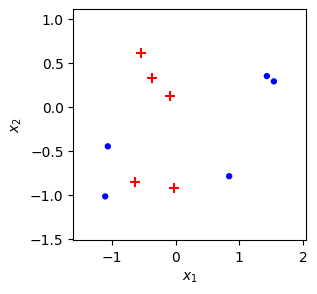

In [ ]:
### ---code required here---
# plot equal weighted data:
plot_adaboost(X, y)


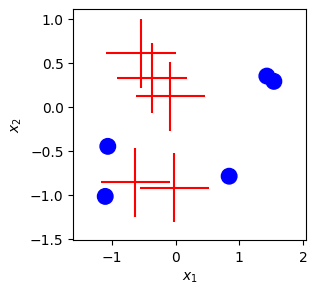

In [ ]:
### ---code required here---
# plot non-equally weighted data:
P = np.where(y == -1, 5, 1)  # weight 5 to negative class and 1 to positive class
plot_adaboost(X, y, P=P)


#### 3.b. Decision Stump as a Weak Learner (5pts)

The decision stump is exactly a decision tree with 1 split for real valued feature attributes. Mathematically, a decision stump for features $\mathbf{x} \in \mathbb{R}^d$ is the Hypothesis class:

\begin{align*}
\mathcal{H} = \left\{ \mathbf{x} \mapsto \text{sign} (\theta - x_j ) \cdot b : \theta \in \mathbb{R}, j \in [d], b\in \{ -1, +1\} \right\}
\end{align*}

where $x_j$ is the $j^{th}$ feature of $\mathbf{x}$. Decision stump can be used as a weak learner as part of AdaBoost algorithm. In the context of AdaBoost, we train the weak learner (decision stump) by minimize a risk function with respect to some distribution $P \in \mathbb{R}^n$ over training set $S = \{(\mathbf{x}_1, y_1), \cdots, (\mathbf{x}_n, y_n) \}$:

\begin{align*}
h^{\ast} = \underset{h \in \mathcal{H}}{\operatorname{argmin}} L_P(S) = \underset{h \in \mathcal{H}}{\operatorname{argmin}} \sum_{i=1}^{n} p_i \mathbb{1}_{\{ h(\mathbf{x}_i) \ne y_i \} }
\end{align*}

where $p_i$ is the $i^{th}$ element of $P$, it is also the weight for data $(\mathbf{x}_i, y_i)$. Essentially, we are finding the optimal model parameter $\theta^{\ast}, j^{\ast}, b^{\ast}$ that minimizes $L_P(S)$ and satisfies constraints specified in the hypothesis class $\mathcal{H}$, and the final model will make prediction by
\begin{align*}
h(\mathbf{x}) = \text{sign}(\theta^{\ast} - x_{j^{\ast}}) \cdot b^{\ast}
\end{align*}

There are fast algorithms to solve the minimization problem, one of which is implemented for you below. The following coding cell can be viewed as a simpler implementation of a model you might call from sklearn. Your task here is to

1.   understand the syntax of a class object in Python, which will also be useful in the later of the course for coding a neural network.
2.   complete the `prediction()` method for a decision stump.

You don't need to understand exactly how the training algorithm goes. If you are interested, the `fit()` method is an implementation of section 10.1.1 of [Understanding Machine Learning from Shai Shalev-Shwartz and Shai Ben-David](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf), which is a recommended reading from the course reading list.


In [ ]:
class Weak_Learner:

    '''
    A function to compute the optimal decision stump

    arguments:
          X: the entire data set in matrix form
          y: the corresponding labels
          P: distribution for each data

    variables inside the constructor:
          j: the j^{th} feature to be splitted
          theta: threshold for the split
          b: either 1 or -1 as part of decision stump
    '''

    # constructor
    def __init__(self):
        self.j = None
        self.theta = None
        self.b = None

    # fit method
    def fit(self, X, y, P = None):
        # initialize current optimal:
        F_star = np.inf

        if P is None:
          P = np.ones(X.shape[0]) / X.shape[0]

        # loop over dimension:
        for j in range(X.shape[1]):

            # sort data using the j^th feature:
            indices = np.argsort(X[:,j])
            x_sorted = X[indices,j]
            y_sorted = y[indices]
            P_sorted = P[indices]

            # append extra element for x_sorted
            x_sorted = np.append(x_sorted, [x_sorted[-1]+1])
            # compute spliting position
            splits = (x_sorted[:-1] + x_sorted[1:]) * 1/2
            splits = np.append([x_sorted[0]-1], splits)

            # current objective:
            F_pos = P_sorted[y_sorted == 1].sum()
            F_neg = P_sorted[y_sorted == -1].sum()

            # if slipt, objective changes:
            delta = y_sorted * P_sorted
            delta = np.append([0], delta)

            # compute objective function values for each splits
            F_pos_val = F_pos - np.cumsum(delta)
            F_neg_val = F_neg + np.cumsum(delta)

            # check the optimal splits and b:
            pos_min = F_pos_val.min()
            pos_indx = F_pos_val.argmin()
            neg_min = F_neg_val.min()
            neg_indx = F_neg_val.argmin()

            if (pos_min < F_star) or (neg_min < F_star):
                if pos_min <= neg_min:
                    self.b = 1
                    self.theta = splits[pos_indx]
                    self.j = j
                    F_star = pos_min
                else:
                    self.b = -1
                    self.theta = splits[neg_indx]
                    self.j = j
                    F_star = neg_min


    # predict method:
    def predict(self, X):
        ### ---code required here---
      feature_column = X[:, self.j]  # Select the feature to split on
      predictions = np.sign(self.theta - feature_column) * self.b
      return predictions


the number of incorrect classifications: 2


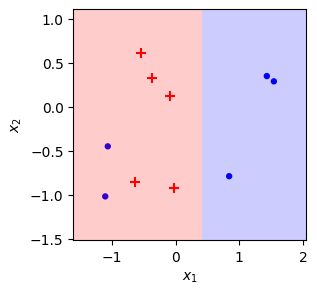

In [ ]:
### ---code required here---
# initialize a Weak_Learner instance in the variable `WL`
WL = Weak_Learner()

# call fit method to train the model
WL.fit(X, y)

# call prediction method to get predicted labels (of training data)
pred = WL.predict(X)

# check whether output match with expectation - compute the number of incorrectly classified points:
wrong_num = np.sum(pred != y)
print('the number of incorrect classifications:', wrong_num)
# use plot_adaboost() to plot the training data, and decision boundary from the trained WL
plot_adaboost(X, y, WL=WL)

#### 3.c. Pieces for AdaBoost (5pts)

Complete the following functions to compute quantities required by the AdaBoost algorithm. Specifically, if we are in iteration $t$, we require three functions:


1.   `weights_on_example()`: this should compute $P_{t}$
2.   `weighted_error()`: this should compute  $\epsilon_t$
3.   `weight_on_classifier()`: this should compute  $\eta_t$



In [ ]:
def weights_on_example(F, y):
    '''
    computes the weights P

    arguments:
      F: numpy array containing predictions of the current
         classifier on the training set. F[i] should be the predicted
         label for example i.
      y: numpy array containing the labels on the training set.

    returns:
      P: numpy array containing the weights for training the next weak learner.
    '''
    ### ---code required here---
    P = np.ones(len(y)) / len(y)

    incorrect = (F != y).astype(int)
    P = P * (incorrect + (1 - incorrect))

    return P

def weighted_error(pred, y, P):
    '''
    computes weighted error of a hypothesis/classifier returned by a weak learner.

    arguments:
      pred: numpy array containing predictions of the hypothesis
      y: numpy array containing labels on the training set.
      P: weights

    returns:
      epsilon: float value equal to the weighted training error.
    '''

    ### ---code required here---
    epsilon = np.sum(P * (pred != y))

    return epsilon

def weight_on_classifier(epsilon):
    '''
    computes scale factor for a classifier returned by a weak learner.

    arguments:
      epsilon: float value giving the weighted training error.

    returns:
      eta: float value giving the scale to multiply this classifier by in AdaBoost.
    '''
    ### ---code required here---
    eta = 0.5 * np.log((1 - epsilon) / (epsilon + 1e-10))  # Adding small value to avoid division by zero

    return eta

#### 3.d. AdaBoost (10pts)

Complete `train()` which resemble the AdaBoost algorithm using functions from previous questions.

Your function should also store some intermediate values for later questions as well as accomplish a visualization task as specified in the function description.



Training error: 0.2


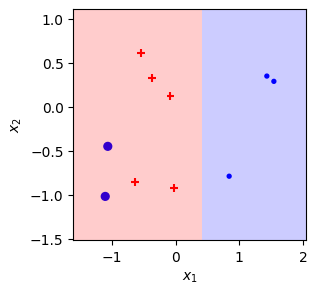

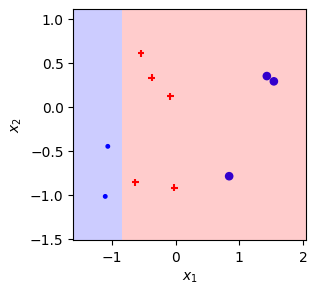

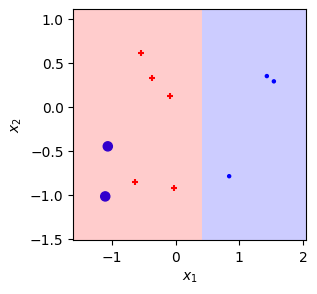

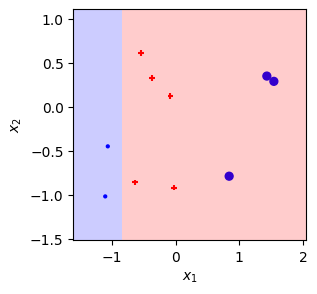

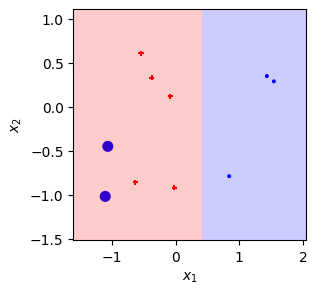

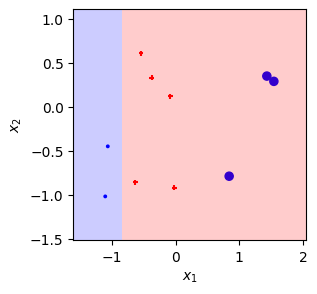

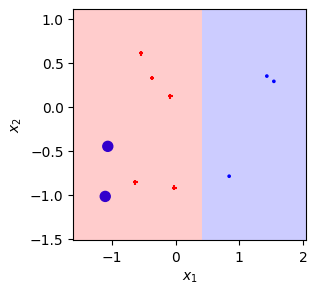

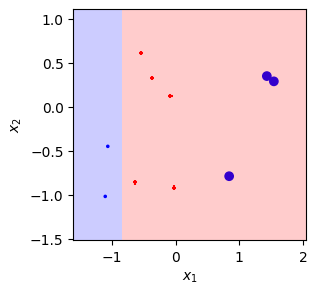

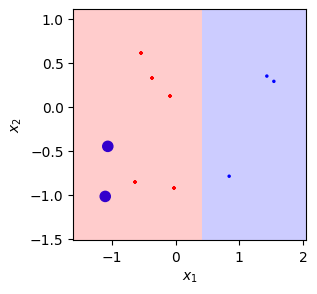

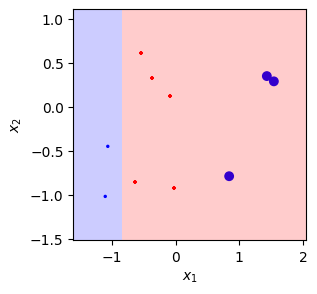

In [ ]:
def train(X, y, T):

    '''
    A function resembles AdaBoost. Ans at each iteration t:
    plot weighthed training data (P_t) and decision boundary produced
    by weak learner instances

      arguments:
        X: the entire data set in matrix form
        y: the corresponding labels
        T: number of total iterations

      returns:
        F: numpy array containing prediction of the AdaBoost algorithm at the end of iteration T (sign(F_{T+1}) in class)
        Models: a length T List of trained Weak_Learner instances for each iteration t
        etas: a numpy array of scaling for each iterationclassifier: eta_t) for each iteration t
          That is, F[i] = sign(sum_t=1^T weights[t] pred[t][i])
          where pred[t] is the list of predictions of Models[t] on the training set.

    '''

    ### ---code required here---
    n_samples = X.shape[0]
    P = np.ones(n_samples) / n_samples
    Models = []
    etas = []
    F = np.zeros(n_samples)

    for t in range(T):
        WL = Weak_Learner()
        WL.fit(X, y, P)

        pred = WL.predict(X)

        epsilon = weighted_error(pred, y, P)

        eta = weight_on_classifier(epsilon)
        etas.append(eta)

        F += eta * pred

        P = weights_on_example(pred, y) * np.exp(-eta * y * pred)
        P /= P.sum()

        Models.append(WL)

        plot_adaboost(X, y, P, WL=WL)

    F_final = np.sign(F)
    return F_final, Models, np.array(etas)

F, Models, etas = train(X, y, T=10)

train_error = np.mean(F != y)
print('Training error:', train_error)

training error:  0.2


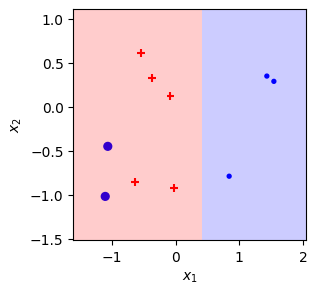

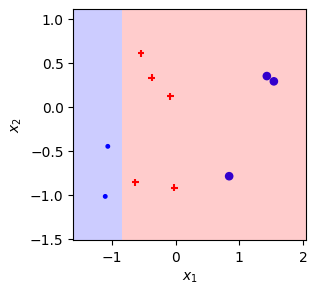

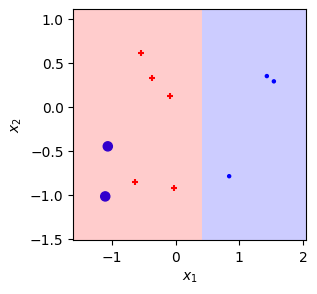

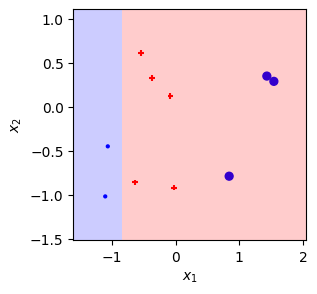

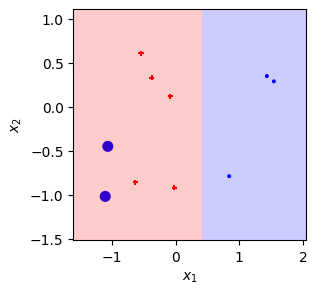

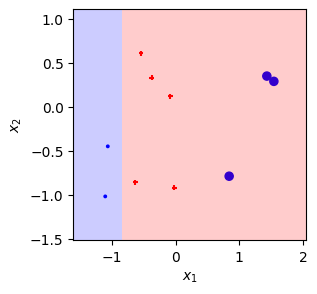

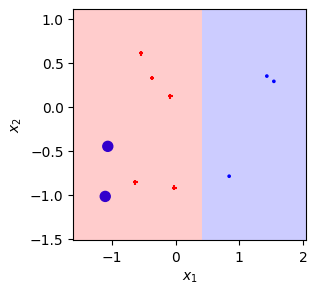

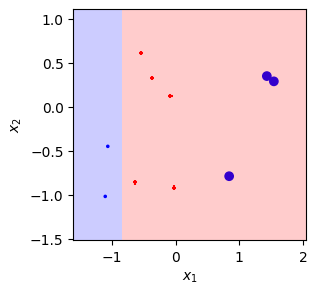

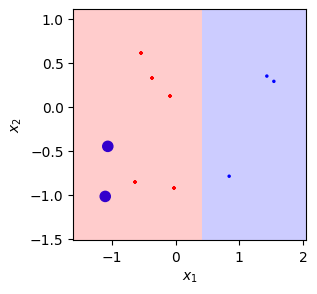

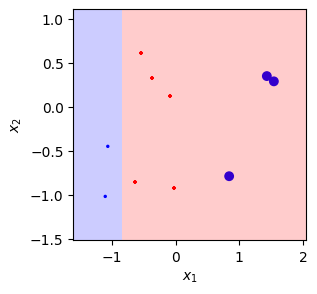

In [ ]:
### ---code required here---
# call your function with `T = 10`. Store the returned values in new variables F, Models, etas.
F, Models, etas = train(X, y, T=10)
# print the training accuracy:
train_error = np.mean(F != y)
print('training error: ', train_error )

Based on the above plots, you should be able to observe if a data is not classified correctly at current iteration. The size of the markers for incorrectly classified data points increases for the next round. This means we elevate the weight for wrongly classified examples and will put more effort to make it correct at next iteration.


#### 3.e. Visualizing the Decision Boundary (5pts)

The AdaBoost uses a linear combination of weak learners as its prediction. The easiest way to visualize the decision boundary of AdaBoost is to simulate it: that is to create a dense mesh grid and make the model make predictions. If you stored and implemented everything correctly, running the following code should allow you to visualize the decision boundary of AdaBoost.

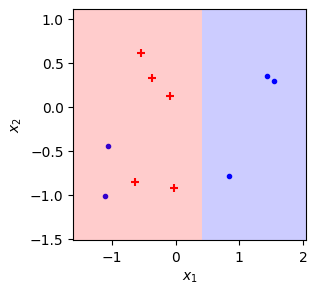

In [ ]:
def plot_staged_db(X, y, Models, etas):
    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.scatter(X[y == 1][:,0], X[y == 1][:,1],  marker='.', color='b')
    ax.scatter(X[y == -1][:,0], X[y == -1][:,1],  marker='+', color='r')

    plot_step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    # reshape to the shape of n by 2:
    grid = np.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))

    F = 0
    for h, eta in zip(Models, etas):
        pred = eta * h.predict(grid)
        pred = pred.reshape(xx.shape)
        F += pred

    F = np.sign(F)

    ax.contourf(xx, yy, F, colors=['r', 'b'], alpha=0.2)

    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plot_staged_db(X, y, Models, etas)

How do weak learners come together to influence the shape of the decision boundary? A multitude of answers will be accepted.

**solution:**

In AdaBoost, weak learners focus on correcting errors from previous learners by placing more weight on misclassified points. Each learner contributes a simple decision boundary, and by combining these boundaries, AdaBoost forms a complex, adaptive boundary that better separates the classes. The influence of each learner is weighted based on its accuracy, so stronger learners shape the boundary more. This iterative process allows AdaBoost to create a robust boundary that effectively handles challenging points.